In [2]:
# importo las librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# cargo el csv en un dataframe

df = pd.read_csv('crash_data.csv', low_memory=False)

In [5]:
# extraigo una muestra del dataset

df_sample = df.sample(n=20)
df_sample.to_csv('sample_data.csv', index=False)


In [6]:
# obtengo información general del dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   172105 non-null  object 
 1   Local Case Number               172105 non-null  object 
 2   Agency Name                     172105 non-null  object 
 3   ACRS Report Type                172105 non-null  object 
 4   Crash Date/Time                 172105 non-null  object 
 5   Route Type                      155132 non-null  object 
 6   Road Name                       156168 non-null  object 
 7   Cross-Street Type               155099 non-null  object 
 8   Cross-Street Name               156154 non-null  object 
 9   Off-Road Description            15935 non-null   object 
 10  Municipality                    19126 non-null   object 
 11  Related Non-Motorist            5463 non-null    object 
 12  Collision Type  

# Gráfico de Barras Apiladas

### Cantidad de Accidentes por Tipo de Vía y Condición Climática

Este gráfico compara la cantidad de accidentes para diferentes categorías en dos variables, en este caso, el tipo de vía y la condición climática. Las barras apiladas ayudan a visualizar la proporción de cada subcategoría dentro de la categoría principal.

<Figure size 1800x1200 with 0 Axes>

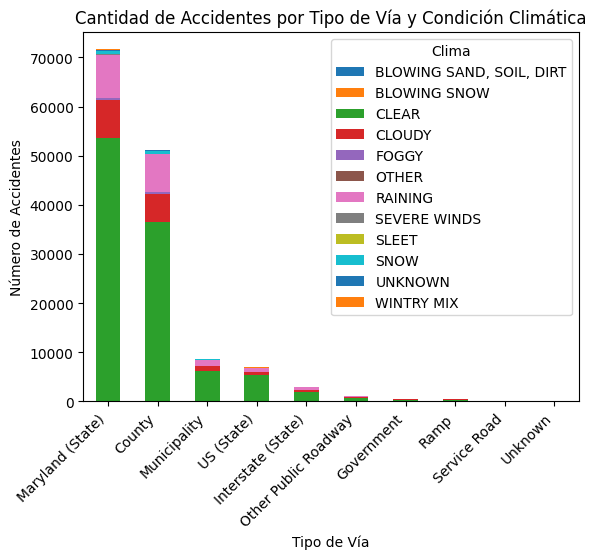

In [12]:
# Tabla de contingencia para contar las combinaciones
tabla = pd.crosstab(df['Route Type'], df['Weather'])

# 1. Calcula la suma de cada fila (tipo de ruta) para ordenar las barras por tamaño
tabla['Total'] = tabla.sum(axis=1)

# Ordena la tabla por la columna 'Total' en orden descendente
tabla = tabla.sort_values('Total', ascending=False).drop('Total', axis=1)

plt.figure(figsize=(18, 12))
tabla.plot(kind='bar', stacked=True)
plt.title('Cantidad de Accidentes por Tipo de Vía y Condición Climática')
plt.xlabel('Tipo de Vía')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clima')
plt.show()

## Tipos de colisión

El gráfico muestra la distribución de los accidentes de tráfico según su tipo de colisión, siendo "SAME DIR REAR END" (Colisión por alcance en la misma dirección) el tipo de accidente más frecuente, con una notable diferencia respecto a los demás.

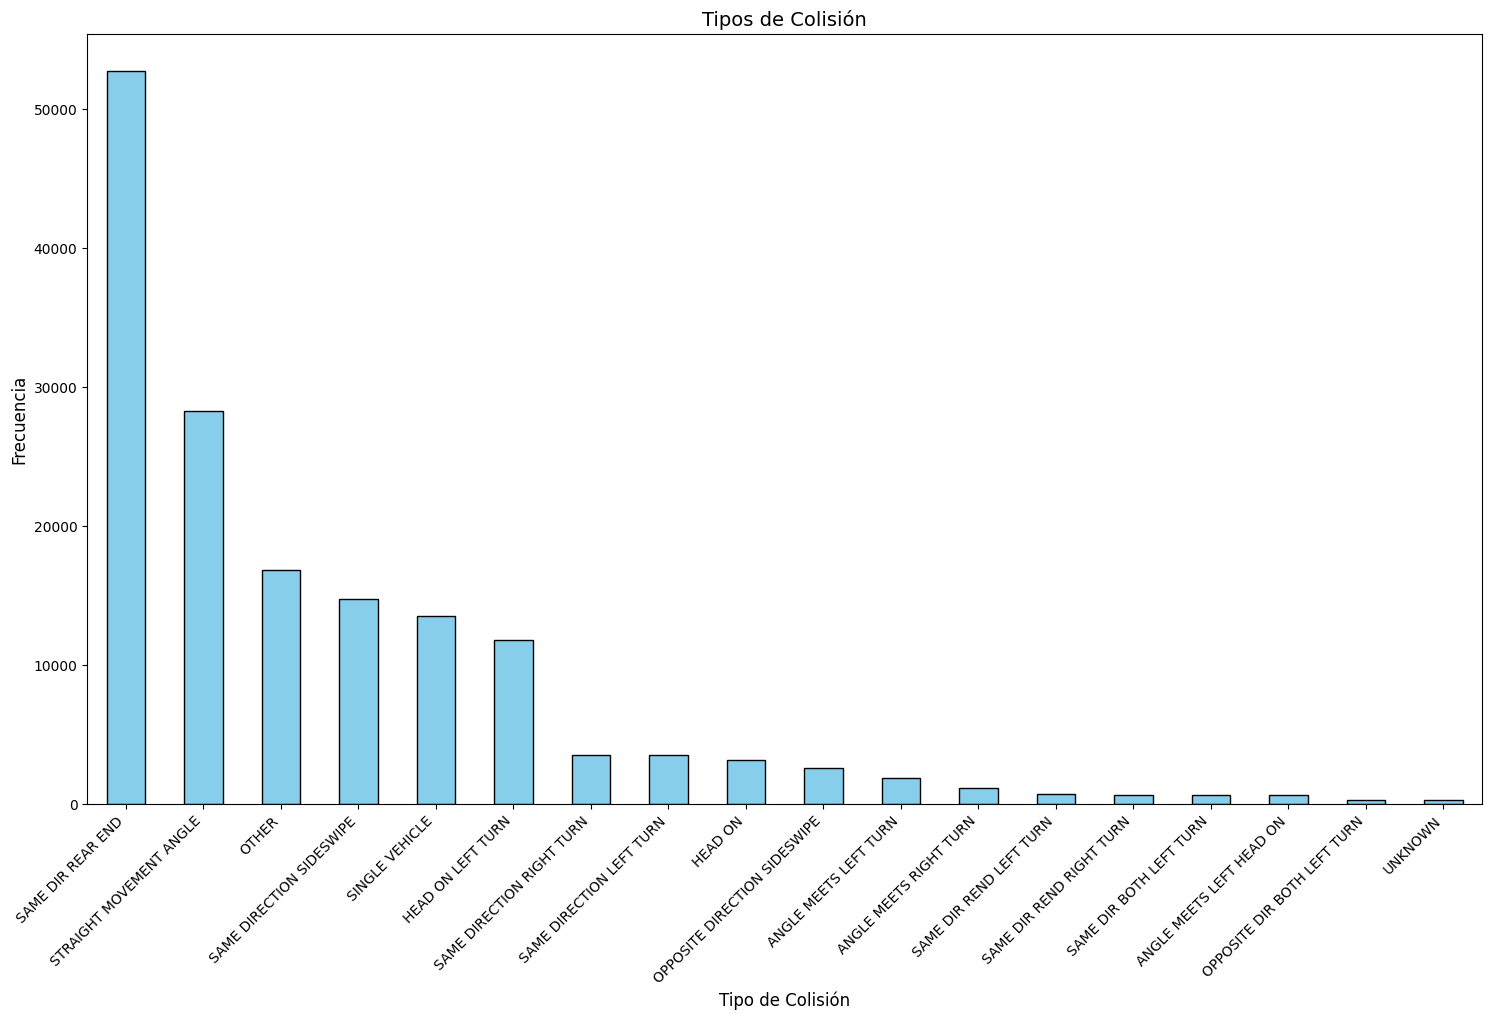

In [37]:

plt.figure(figsize=(18, 10))
df['Collision Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Tipos de Colisión', fontsize=14)
plt.xlabel('Tipo de Colisión', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

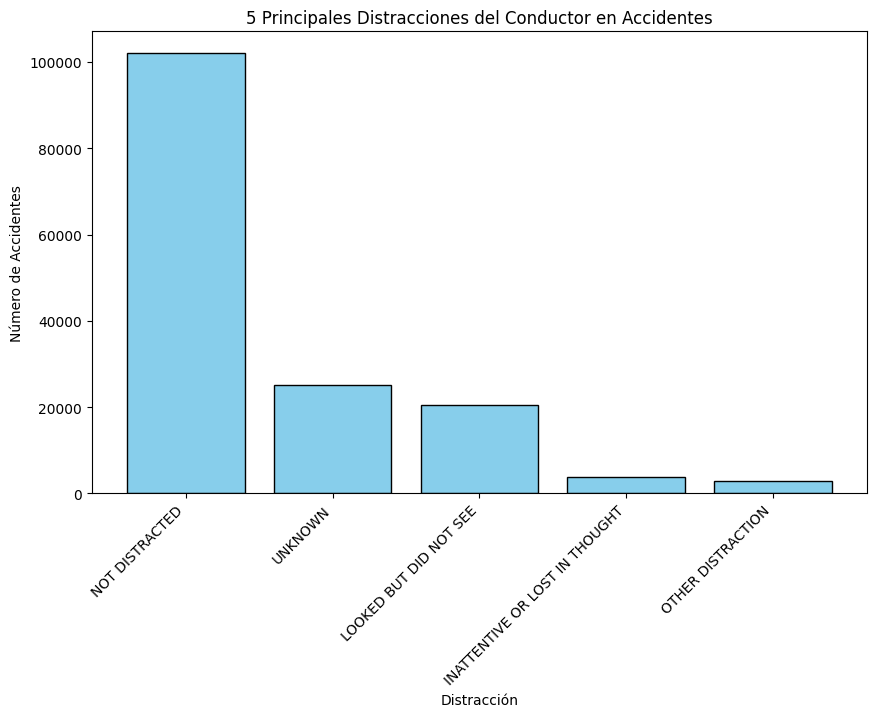

In [14]:
# principales distracciones de los conductores

top_5_distractions = df['Driver Distracted By'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_distractions.index, top_5_distractions.values, color='skyblue', edgecolor='black')
plt.title('5 Principales Distracciones del Conductor en Accidentes')
plt.xlabel('Distracción')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Antigüedad de los vehículos involucrados en los accidentes (Histograma de la variable "Vehicle Year").

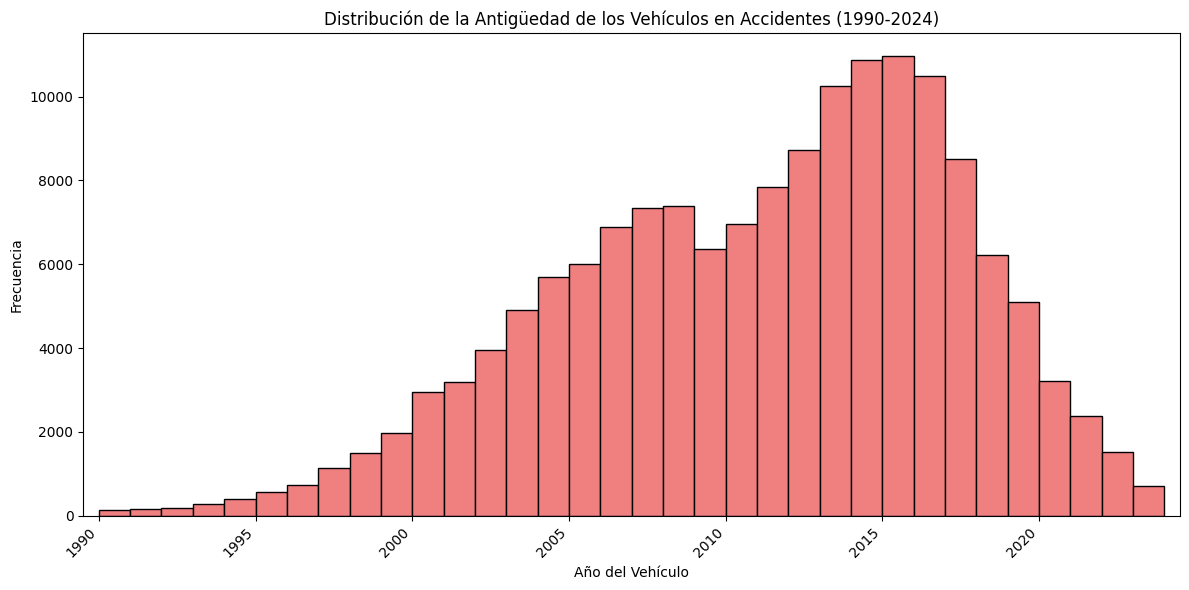

In [23]:
# filtro df desde 1990 hasta 2024
df_filtrado = df[(df['Vehicle Year'] >= 1990) & (df['Vehicle Year'] <= 2024)]

plt.figure(figsize=(12, 6))  

# años únicos df
years = sorted(df_filtrado['Vehicle Year'].unique())

plt.hist(df_filtrado['Vehicle Year'], bins=years, edgecolor='black', color='lightcoral')
plt.title('Distribución de la Antigüedad de los Vehículos en Accidentes (1990-2024)')
plt.xlabel('Año del Vehículo')
plt.ylabel('Frecuencia')

# etiquetas del eje x
plt.xticks(rotation=45, ha='right') 

# límites del eje x
plt.xlim(df_filtrado['Vehicle Year'].min() - 0.5, df_filtrado['Vehicle Year'].max() + 0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Configuración general de estilo
sns.set_theme(style="whitegrid")
colors = sns.color_palette("husl", 8)

# print(df['Crash Date/Time'].head())

# Convierto la columna 'Crash Date/Time' a datetime
df['crash_date_time'] = pd.to_datetime(df['crash_date_time'], format='%m/%d/%Y %I:%M:%S %p')

# Extraigo componentes de tiempo
df['hour'] = df['crash_date_time'].dt.hour
df['day_of_week'] = df['crash_date_time'].dt.dayofweek
df['month'] = df['crash_date_time'].dt.month
df['year'] = df['crash_date_time'].dt.year

# Orden correcto de los días de la semana
correct_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Mapeo los números de día a nombres de día
day_mapping = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df['day_of_week'] = df['day_of_week'].map(day_mapping)

# Columna categórica ordenada para los días de la semana
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=correct_order, ordered=True)

# Función para mejorar la presentación de los gráficos
def improve_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    sns.despine(left=True, bottom=True)

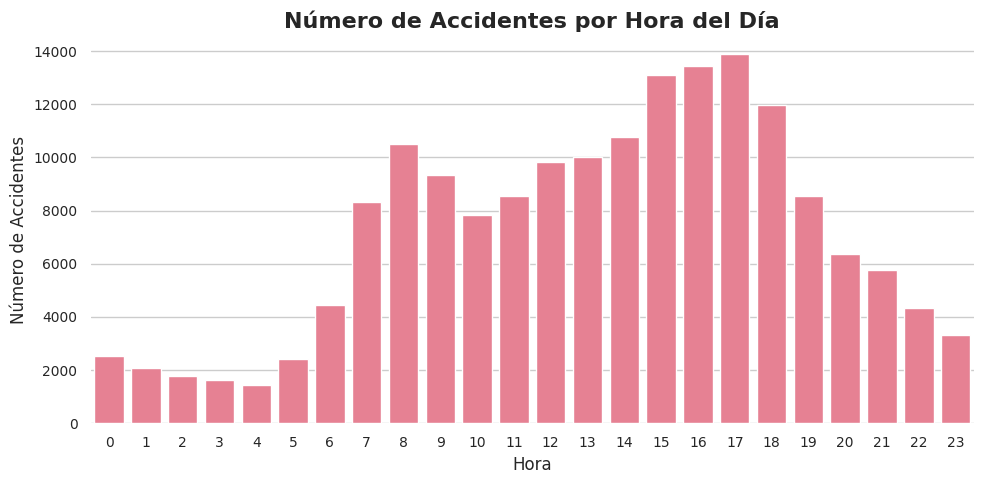

In [ ]:
# Análisis por hora del día
hourly_accidents = df['hour'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, ax=ax, color=colors[0])
improve_plot(ax, 'Número de Accidentes por Hora del Día', 'Hora', 'Número de Accidentes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

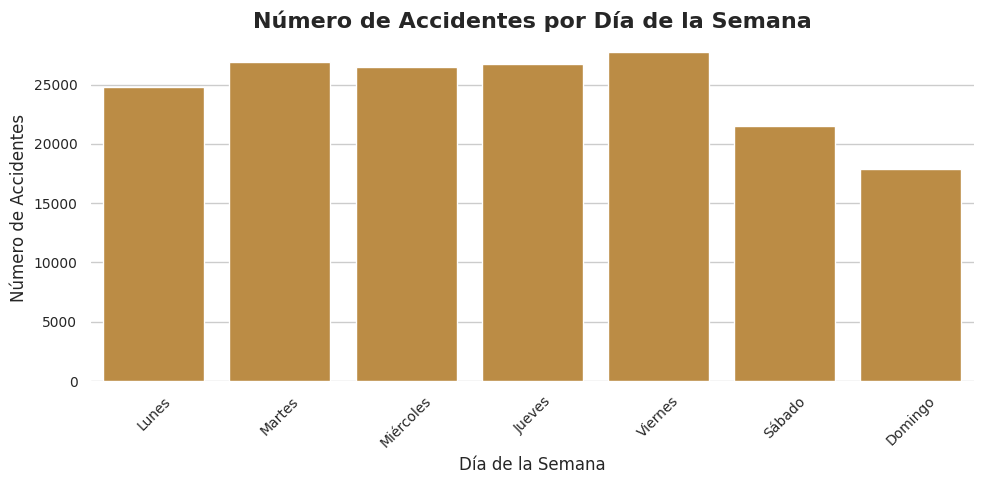

In [ ]:
# Análisis por día de la semana
weekly_accidents = df['day_of_week'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=weekly_accidents.index, y=weekly_accidents.values, ax=ax, color=colors[1])
improve_plot(ax, 'Número de Accidentes por Día de la Semana', 'Día de la Semana', 'Número de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

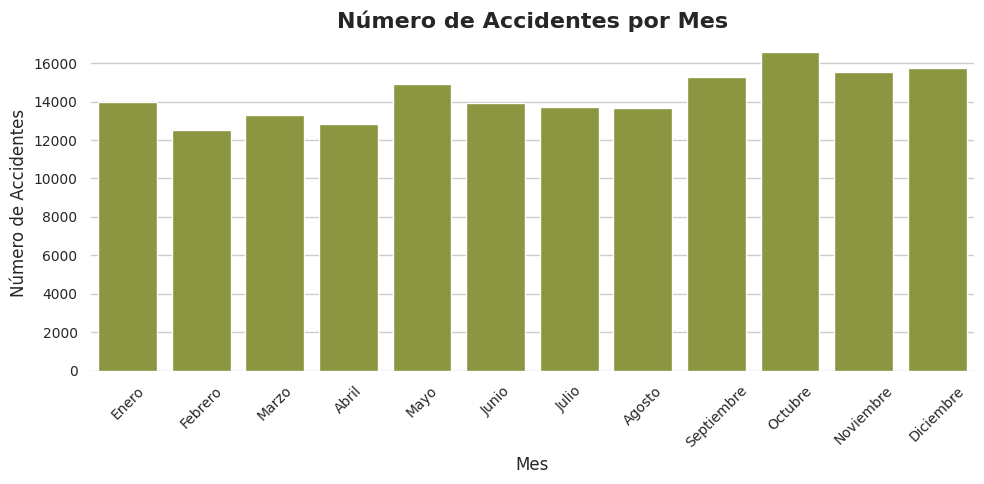

In [ ]:
# Análisis por mes
month_mapping = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
                 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
df['month'] = df['month'].map(month_mapping)
monthly_accidents = df['month'].value_counts().reindex(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                                        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values, ax=ax, color=colors[2])
improve_plot(ax, 'Número de Accidentes por Mes', 'Mes', 'Número de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

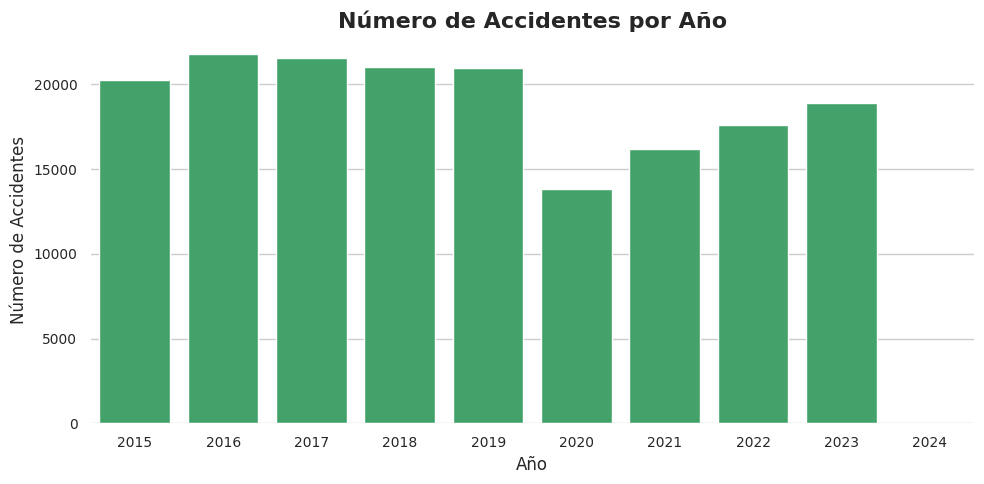

In [ ]:
# Análisis por año
yearly_accidents = df['year'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=yearly_accidents.index, y=yearly_accidents.values, ax=ax, color=colors[3])
improve_plot(ax, 'Número de Accidentes por Año', 'Año', 'Número de Accidentes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

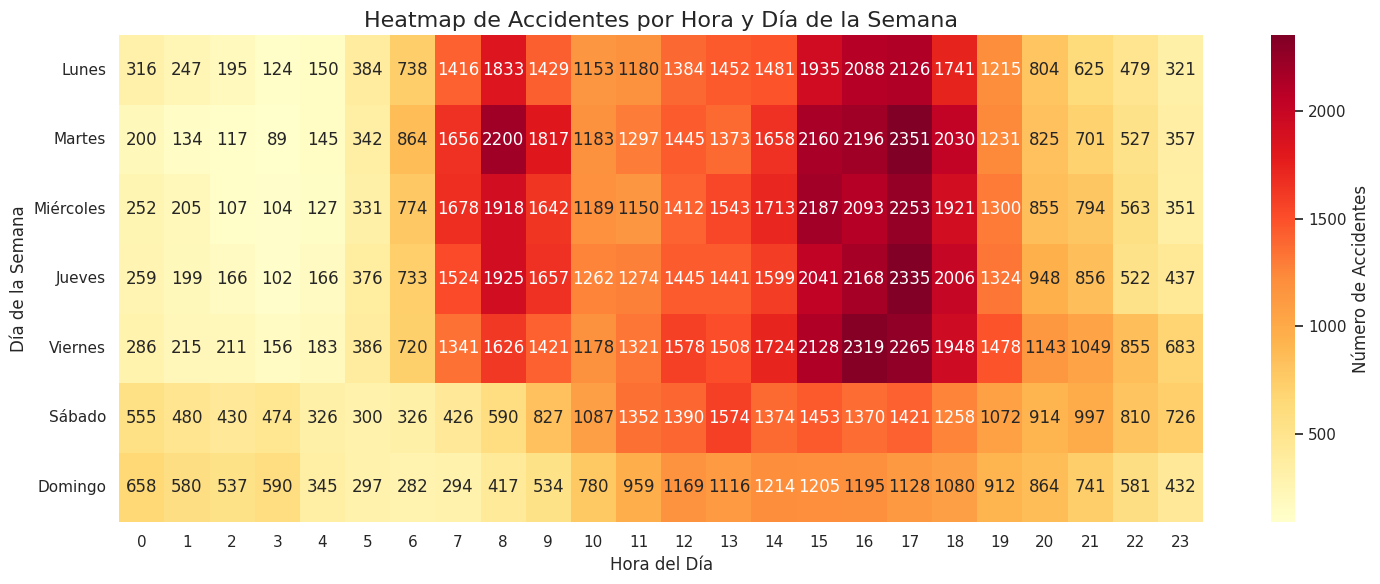

In [ ]:
# heatmap de accidentes por hora y día de la semana
plt.figure(figsize=(15, 6))
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()

# reordeno índice del heatmap para que coincida con el orden correcto de los días
heatmap_data = heatmap_data.reindex(correct_order)

# creo el heatmap
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g', cbar_kws={'label': 'Número de Accidentes'})
plt.title('Heatmap de Accidentes por Hora y Día de la Semana', fontsize=16)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Día de la Semana', fontsize=12)

# ajuste etiquetas
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# alternativas para cmap='YlOrRd' // para cambiar el color del heatmap
# no ejecutar

alternative_cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
                     'Blues', 'Greens', 'Reds', 'Purples', 'Oranges',
                     'coolwarm', 'seismic', 'RdBu_r', 'PuBuGn']

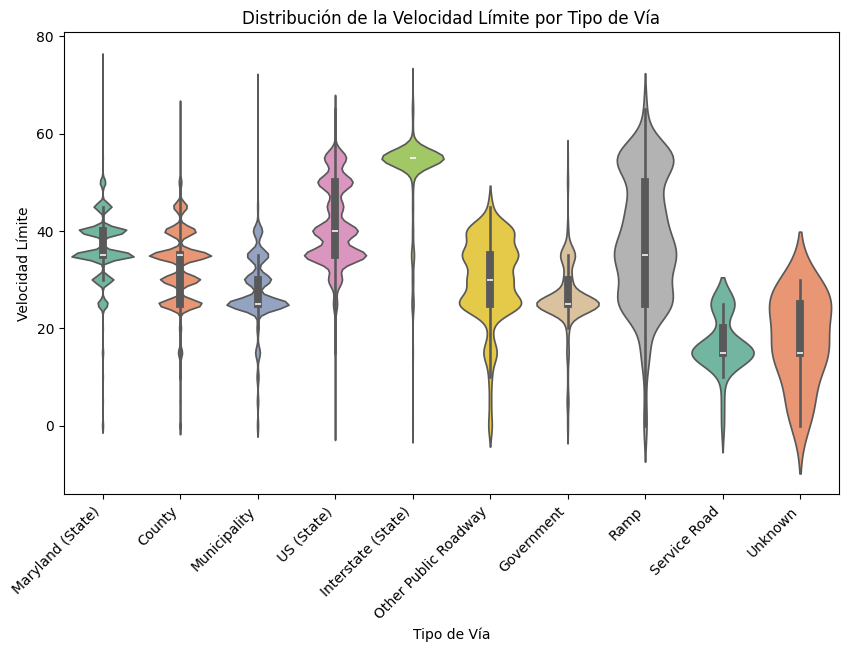

In [27]:
# violinplot distribución de velocidad límite por tipo de vía

plt.figure(figsize=(10, 6))
sns.violinplot(x='Route Type', y='Speed Limit', data=df, palette='Set2')
plt.title('Distribución de la Velocidad Límite por Tipo de Vía')
plt.xlabel('Tipo de Vía')
plt.ylabel('Velocidad Límite')
plt.xticks(rotation=45, ha='right')
plt.show()